In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import pandas as pd

c:\Users\mubas\miniconda3\envs\offline1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('pca_data_online_1.txt', delim_whitespace=True, header=None)
# to numpy
X = df.values
print(type(X), X.shape)

C:\Users\mubas\AppData\Local\Temp\ipykernel_29204\3001619257.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('pca_data_online_1.txt', delim_whitespace=True, header=None)


<class 'numpy.ndarray'> (1000, 500)


In [3]:
def pca(X, top_no=2):
    X_mean = np.mean(X, axis=0)
    # X_centered = (X - X_mean)/np.std(X, axis=0)
    X_centered = (X - X_mean)
    covariance_matrix = 1/(X.shape[0]-1) * np.dot(X_centered.T, X_centered)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # highest two eigenvalues and corresponding eigenvectors
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    top_eigenvectors = eigenvectors[:, list(range(top_no))]

    # project data
    X_pca = np.dot(X_centered, top_eigenvectors)
    return X_pca

In [4]:

X_pca = pca(X, top_no=2)
print(X_pca.shape)


(1000, 2)


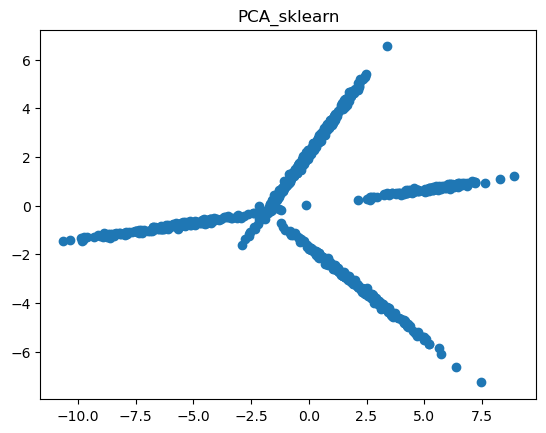

In [5]:
#sklearn pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_ = pca.fit_transform(X)
plt.title('PCA_sklearn')
plt.scatter(X_pca_[:, 0], X_pca_[:, 1])
plt.show()


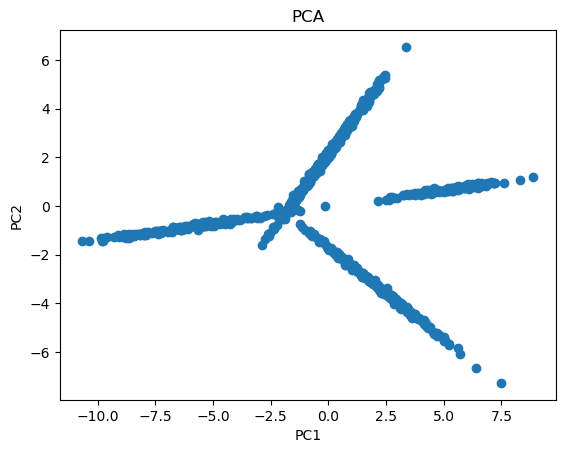

In [6]:

# plot,show the points distinctly
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

(1000, 2)


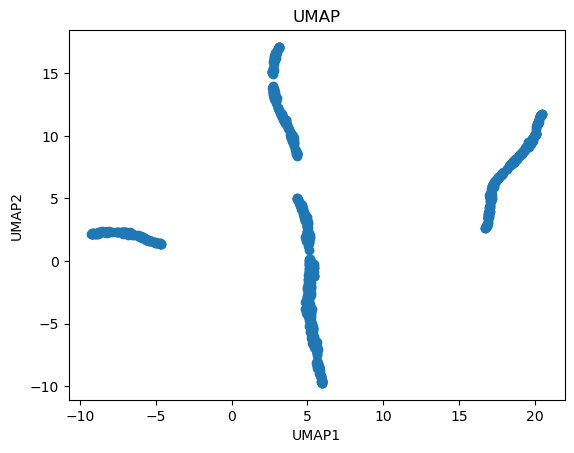

In [7]:

# umap
# X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
X = (X - np.mean(X, axis=0))
ump = umap.UMAP(n_components=2)
X_umap = ump.fit_transform(X)
print(X_umap.shape)

plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP')
plt.show()


(1000, 2)


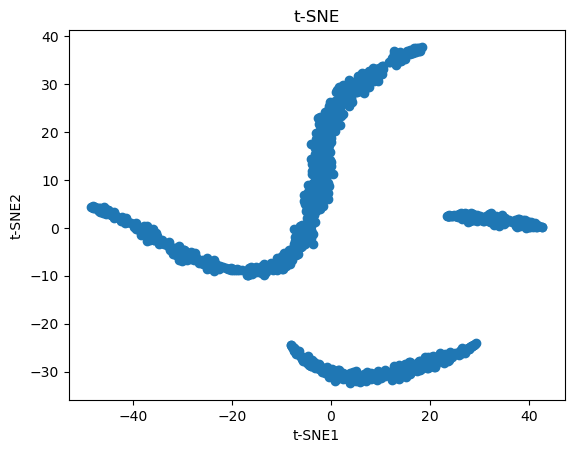

In [8]:
# t-SNE
# X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
X = (X - np.mean(X, axis=0))
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE')
plt.show()